Yuyu Fan & Yining Shen

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
X_t = np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_train.data")
Y_t = np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_train.labels")
X_T = np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_valid.data")
Y_T = np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_valid.labels")

In [5]:
class logisticRegression:
    def __init__(self, xTr, yTr, xVal, yVal,
            #nIter=500, eta=0.01, k=10, s=0.001, miu=100.):
            #nIter=500, eta=0.005, k=10, s=0.001, miu=100.):
            nIter=500, eta=0.0025, k=30, s=0.001, miu=50.):
        self.xTr=xTr
        self.yTr=yTr
        self.xVal=xVal
        self.yVal=yVal
        self.s=s
        self.miu=miu
        self.nIter=nIter
        self.k=k
        self.eta=eta

        self.preProcess()
        # M is based on the duplicate features removed version
        self.M=self.xTr.shape[1]
        self.w=np.zeros(self.xTr.shape[1])
        
    def preProcess(self):
        xStd=np.std(self.xTr, axis=0)
        mask=(xStd!=0.)
        self.xTr=self.xTr[:, mask]
        meanX=np.mean(self.xTr, axis=0)
        stdX=np.std(self.xTr, axis=0)
        self.xTr=(self.xTr-meanX)/stdX
        self.xVal=self.xVal[:, mask]
        self.xVal=(self.xVal-meanX)/stdX

        self.xTr=np.insert(self.xTr, 0, 1., axis=1)
        self.xVal=np.insert(self.xVal, 0, 1., axis=1)

        self.yTr[self.yTr==0.]=-1.
        self.yVal[self.yVal==0.]=-1.
#         print('finish preprocessing data')

    def gradient(self):
        wx=np.sum(self.xTr*self.w, axis=1)
        ywx=wx*self.yTr
        temp=2.*(ywx-1.)/(1.+(ywx-1.)*(ywx-1.))
        temp=temp*self.yTr
        temp[ywx>1.]=0.
        grad=np.sum((self.xTr).T*temp, axis=1)+2.*self.s*self.w
        return grad

    def update(self, i):
        grad=self.gradient()
        self.w-=self.eta*grad
        self.fsa(i)

    def fsa(self, i):
        mi=self.k+(self.M-self.k)*max(0.,
                (self.nIter-2*i)/(2*i*self.miu+self.nIter))
        mi=int(mi)
#         print(i, 'mi', mi)
        wAbs=np.absolute(self.w)
        wAbsSort=np.argsort(wAbs)
        wAbsSort=wAbsSort[-mi:]
        self.w=self.w[wAbsSort]
        self.xTr=(self.xTr.T[wAbsSort]).T
        self.xVal=(self.xVal.T[wAbsSort]).T

    def train(self):
        loss=np.zeros(self.nIter)
        misclassTr=np.zeros(self.nIter)
        misclassVal=np.zeros(self.nIter)
        for i in range(self.nIter):
            self.update(i)
            wx=np.sum(self.xTr*self.w, axis=1)
            ywx=wx*self.yTr
            temp=np.log(1.+(ywx-1.)*(ywx-1.))
            temp[ywx>1.]=0.
            loss[i]=np.sum(temp)+self.s*np.sum(self.w*self.w)
            pred=np.ones(self.yTr.shape[0])
            pred[wx<0.]=-1
            misclassTr[i]=1.-np.mean(pred==self.yTr)

            wx=np.sum(self.xVal*self.w, axis=1)
            pred=np.ones(self.yVal.shape[0])
            pred[wx<0.]=-1
            misclassVal[i]=1.-np.mean(pred==self.yVal)
#             print(i, 'loss, miss classification err in train, val: ',
#                     loss[i], misclassTr[i], misclassVal[i])
        return loss, misclassTr, misclassVal


In [6]:
def project3a():
    xTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_train.data")
    yTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/Gisette/gisette_train.labels")
    xVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/Gisette/gisette_valid.data")
    yVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_valid.labels")
    print('finish loading data')
    ks=[10, 30, 100, 300, 500]
    #etas=[0.003, 0.001, 0.001, 0.001]
    #etas=[0.004, 0.0005, 0.0005, 0.0005]
    etas=[0.005, 0.0001, 0.0001, 0.0001, 0.0001]
    misclassErrTr=np.zeros(len(ks))
    misclassErrVal=np.zeros(len(ks))
    figureIndex=0
    for i in range(len(ks)):
        lr=logisticRegression(xTr, yTr, xVal, yVal, eta=etas[i],
                k=ks[i])
        loss, misclassTr, misclassVal=lr.train()
        index=np.argsort(misclassVal)
        misclassErrTr[i]=misclassTr[index[0]]
        misclassErrVal[i]=misclassVal[index[0]]

        plt.figure(figureIndex)
        figureIndex += 1
        plt.plot(np.arange(loss.shape[0]), misclassTr, label='train')
        plt.plot(np.arange(loss.shape[0]), misclassVal, label='test')
        plt.xlabel('iteration')
        plt.ylabel('miss classification ratio')
        plt.legend()

        plt.figure(figureIndex)
        figureIndex += 1
        plt.plot(np.arange(loss.shape[0]), loss)
        plt.xlabel('iteration')
        plt.ylabel('loss')

    myfile=open('gisette.dat', 'w')
    for i in range(len(ks)):
        myfile.write(str(ks[i])+' '+str(misclassErrTr[i])+
                                ' '+str(misclassErrVal[i])+'\n')
    myfile.close()
    plt.show()

    errors = pd.DataFrame([np.arange(loss.shape[0]),loss]).T
    errors.columns = ['iter','error']
    E = errors.loc[(errors['iter'] == 9) | (errors['iter'] == 29)|(errors['iter'] == 99)|
               (errors['iter'] == 299)| (errors['iter'] == 499)]

    return E


finish loading data


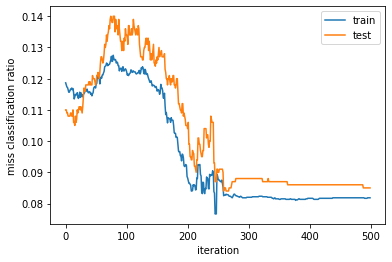

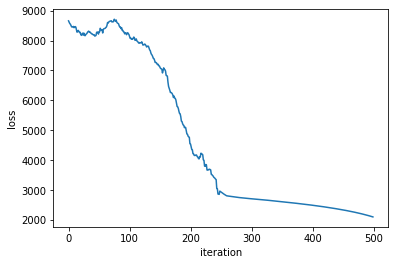

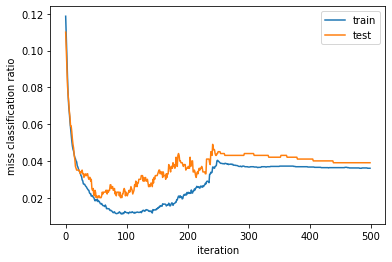

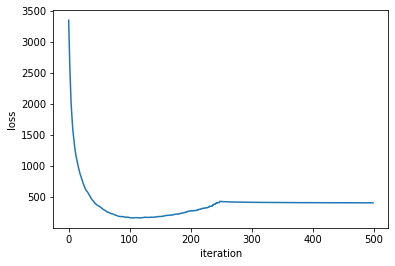

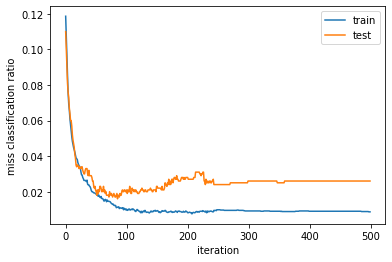

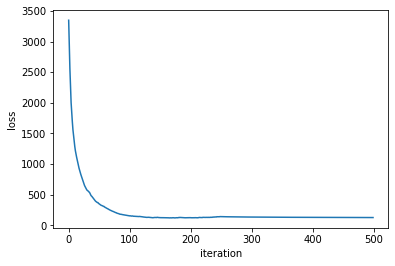

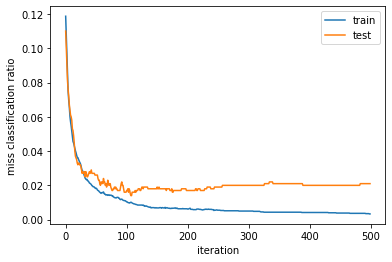

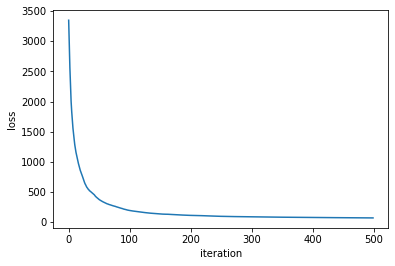

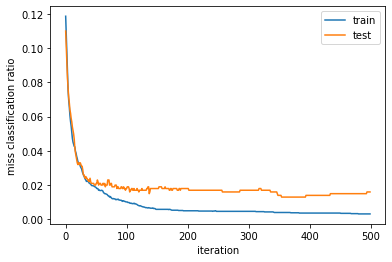

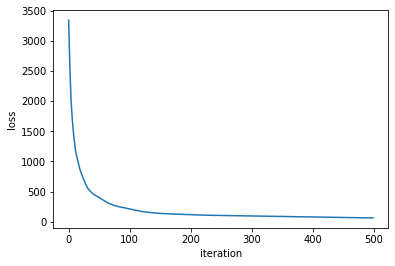

,iter,error
9,9.0,1368.264566
29,29.0,597.294815
99,99.0,212.871616
299,299.0,94.298446
499,499.0,61.625422


In [7]:
project3a()

In [8]:
def project3b():
    xTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_train.data")
    yTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_train.labels")
    xVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_valid.data")
    yVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_valid.labels")
    print('finish loading data')
    ks=[10, 30, 100, 300, 500]
    #etas=[0.003, 0.001, 0.001, 0.001]
    #etas=[0.001, 0.001, 0.001, 0.001]
    #etas=[0.005, 0.0001, 0.0001, 0.0001]
    #etas=[0.001, 0.0001, 0.0001, 0.0001]
    #      b, g,b,g
    #etas=[0.003, 0.001, 0.00005, 0.001]
    #etas=[0.001, 0.001, 0.00001, 0.001]
    #etas=[0.0001, 0.001, 0.0005, 0.001]
    etas=[0.0005, 0.001, 0.001, 0.001, 0.001]
    misclassErrTr=np.zeros(len(ks))
    misclassErrVal=np.zeros(len(ks))
    figureIndex=0
    for i in range(len(ks)):
        print(i, 'before lr, xTr shape', xTr.shape)
        lr=logisticRegression(xTr, yTr, xVal, yVal, eta=etas[i],
                k=ks[i])
        print(i, 'after lr, xTr shape', xTr.shape)
        loss, misclassTr, misclassVal=lr.train()
        index=np.argsort(misclassVal)
        misclassErrTr[i]=misclassTr[index[0]]
        misclassErrVal[i]=misclassVal[index[0]]

        plt.figure(figureIndex)
        figureIndex += 1
        plt.plot(np.arange(loss.shape[0]), misclassTr, label='train')
        plt.plot(np.arange(loss.shape[0]), misclassVal, label='test')
        plt.xlabel('iteration')
        plt.ylabel('miss classification ratio')
        plt.legend()

        plt.figure(figureIndex)
        figureIndex += 1
        plt.plot(np.arange(loss.shape[0]), loss)
        plt.xlabel('iteration')
        plt.ylabel('loss')
        
    myfile=open('dexter.dat', 'w')
    for i in range(len(ks)):
        myfile.write(str(ks[i])+' '+str(misclassErrTr[i])+
                                ' '+str(misclassErrVal[i])+'\n')
    myfile.close()
    plt.show()
    
    errors = pd.DataFrame([np.arange(loss.shape[0]),loss]).T
    errors.columns = ['iter','error']
    E = errors.loc[(errors['iter'] == 9) | (errors['iter'] == 29)|(errors['iter'] == 99)|
               (errors['iter'] == 299)| (errors['iter'] == 499)]

    return E


finish loading data
0 before lr, xTr shape (6000, 5000)
0 after lr, xTr shape (6000, 5000)
1 before lr, xTr shape (6000, 5000)
1 after lr, xTr shape (6000, 5000)
2 before lr, xTr shape (6000, 5000)
2 after lr, xTr shape (6000, 5000)
3 before lr, xTr shape (6000, 5000)
3 after lr, xTr shape (6000, 5000)
4 before lr, xTr shape (6000, 5000)
4 after lr, xTr shape (6000, 5000)


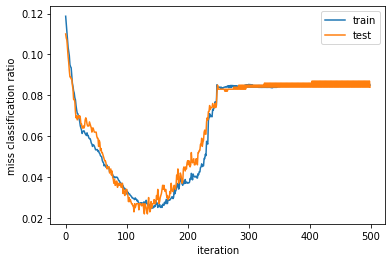

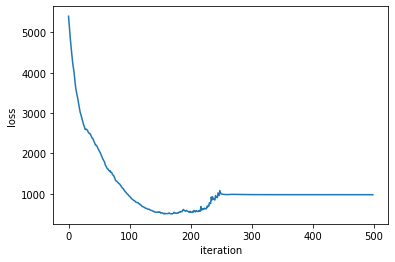

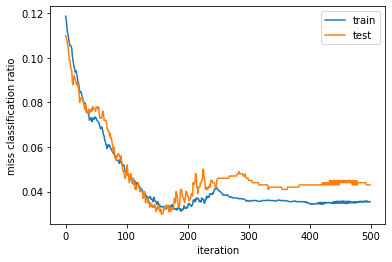

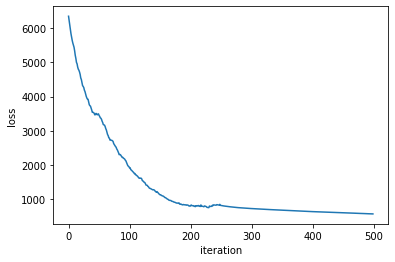

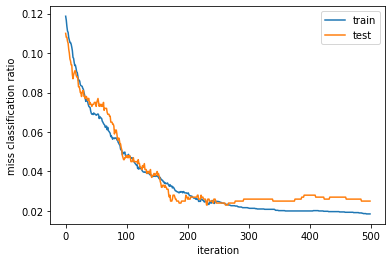

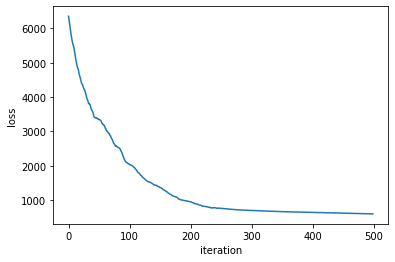

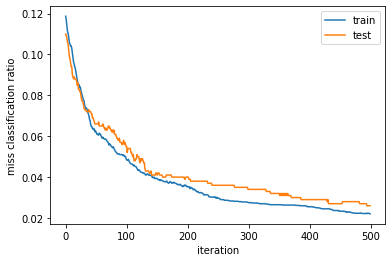

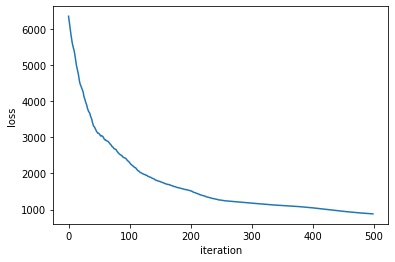

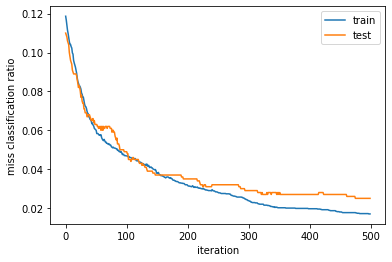

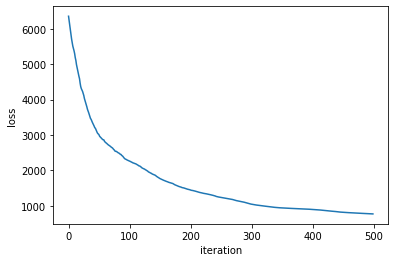

,iter,error
9,9.0,5379.368198
29,29.0,3870.713634
99,99.0,2275.009910
299,299.0,1051.022770
499,499.0,773.514423


In [9]:
project3b()

In [10]:
def project3c():
    xTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_train.data")
    yTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_train.labels")
    xVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_valid.data")
    yVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\data/Gisette/gisette_valid.labels")
    print('finish loading data')
    ks=[10, 30, 100, 300, 500]
    #etas=[0.003, 0.001, 0.001, 0.001]
    #etas=[0.001, 0.0001, 0.0001, 0.0001]
    #etas=[0.004, 0.0005, 0.0005, 0.0005]
    etas=[0.001, 0.0001, 0.0005, 0.0001, 0.0001]
    misclassErrTr=np.zeros(len(ks))
    misclassErrVal=np.zeros(len(ks))
    figureIndex=0
    for i in range(len(ks)):
        lr=logisticRegression(xTr, yTr, xVal, yVal, eta=etas[i],
                k=ks[i])
        loss, misclassTr, misclassVal=lr.train()
        index=np.argsort(misclassVal)
        misclassErrTr[i]=misclassTr[index[0]]
        misclassErrVal[i]=misclassVal[index[0]]

        plt.figure(figureIndex)
        figureIndex += 1
        plt.plot(np.arange(loss.shape[0]), misclassTr, label='train')
        plt.plot(np.arange(loss.shape[0]), misclassVal, label='test')
        plt.xlabel('iteration')
        plt.ylabel('miss classification ratio')
        plt.legend()

        plt.figure(figureIndex)
        figureIndex += 1
        plt.plot(np.arange(loss.shape[0]), loss)
        plt.xlabel('iteration')
        plt.ylabel('loss')
        
    myfile=open('madelon.dat', 'w')
    for i in range(len(ks)):
        myfile.write(str(ks[i])+' '+str(misclassErrTr[i])+
                                ' '+str(misclassErrVal[i])+'\n')
    myfile.close()        
        
    plt.show()
    
    errors = pd.DataFrame([np.arange(loss.shape[0]),loss]).T
    errors.columns = ['iter','error']
    E = errors.loc[(errors['iter'] == 9) | (errors['iter'] == 29)|(errors['iter'] == 99)|
               (errors['iter'] == 299)| (errors['iter'] == 499)]

    return E



finish loading data


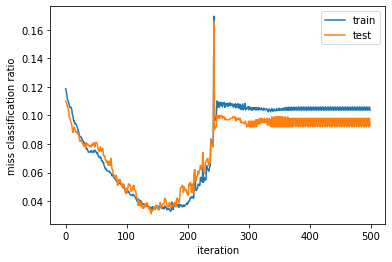

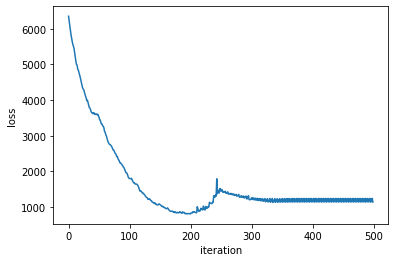

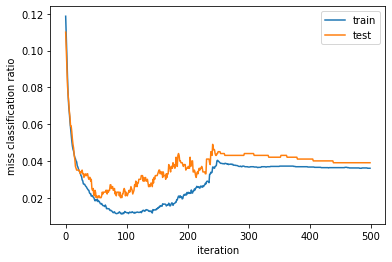

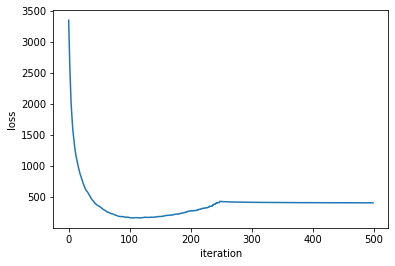

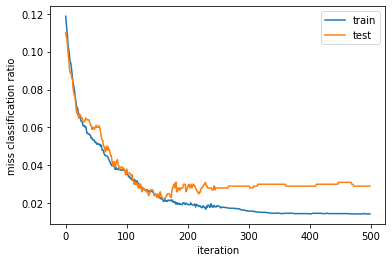

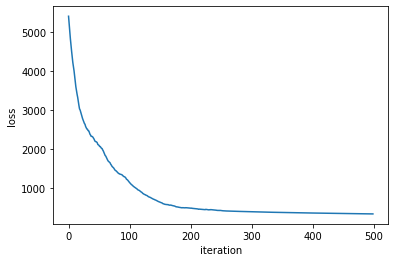

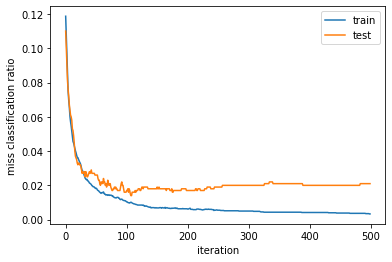

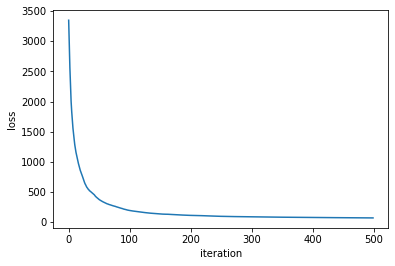

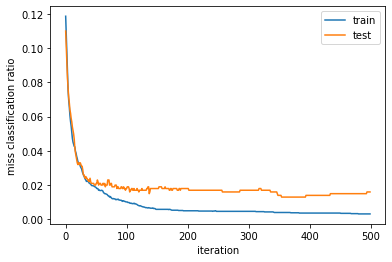

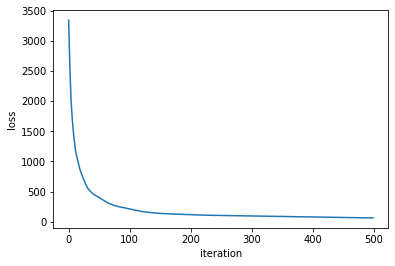

,iter,error
9,9.0,1368.264566
29,29.0,597.294815
99,99.0,212.871616
299,299.0,94.298446
499,499.0,61.625422


In [11]:
project3c()

In [12]:
def draw():
    gisette=np.loadtxt('gisette.dat')
    dexter=np.loadtxt('dexter.dat')
    madelon=np.loadtxt('madelon.dat')
    figureIndex = 0

    plt.figure(figureIndex)
    figureIndex += 1
    plt.plot(gisette[:,0], gisette[:,1], 'o-', label='train')
    plt.plot(gisette[:,0], gisette[:,2], 's-', label='test')
    plt.xlabel('k')
    plt.ylabel('misclassification ratio')
    plt.legend()

    plt.figure(figureIndex)
    figureIndex += 1
    plt.plot(dexter[:,0], dexter[:,1], 'o-', label='train')
    plt.plot(dexter[:,0], dexter[:,2], 's-', label='test')
    plt.xlabel('k')
    plt.ylabel('misclassification ratio')
    plt.legend()

    plt.figure(figureIndex)
    figureIndex += 1
    plt.plot(madelon[:,0], madelon[:,1], 'o-', label='train')
    plt.plot(madelon[:,0], madelon[:,2], 's-', label='test')
    plt.xlabel('k')
    plt.ylabel('misclassification ratio')
    plt.legend()

    plt.show()

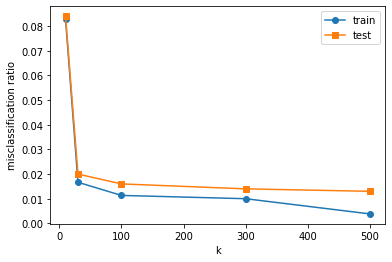

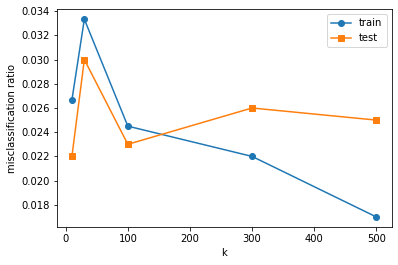

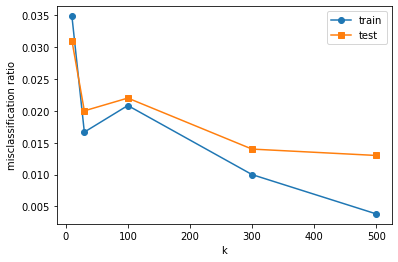

In [13]:
draw()